In [4]:
import pandas as pd
import numpy as np

In [5]:
#!pip install --upgrade pip
#!pip install --upgrade wordcloud
#!conda update -y -n base -c defaults conda
#!conda install -y -c conda-forge wordcloud



In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
#load dow jones data from CSV file

import google.datalab.storage as storage
import pandas as pd
from io import BytesIO

mybucket = storage.Bucket('bharti_patel')
dowj_csv = mybucket.object('DJI.csv')

uri = dowj_csv.uri
%gcs read --object $uri --variable dowj

dowj = pd.read_csv(BytesIO(dowj), index_col=0, parse_dates=True, infer_datetime_format=True)

In [8]:

dowj.columns = ['Open','High' ,'Low', 'Close','Adj_Close','Volume']

In [9]:
dowj = dowj.drop(['Open','High','Low','Adj_Close'], 1)

In [10]:
dowj.head()



,Close,Volume
Date,,
2005-01-03,10729.429688,270620000
2005-01-04,10630.780273,293280000
2005-01-05,10597.830078,263550000
2005-01-06,10622.879883,232850000
2005-01-07,10603.959961,283770000


In [11]:
list(dowj)

['Close', 'Volume']

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


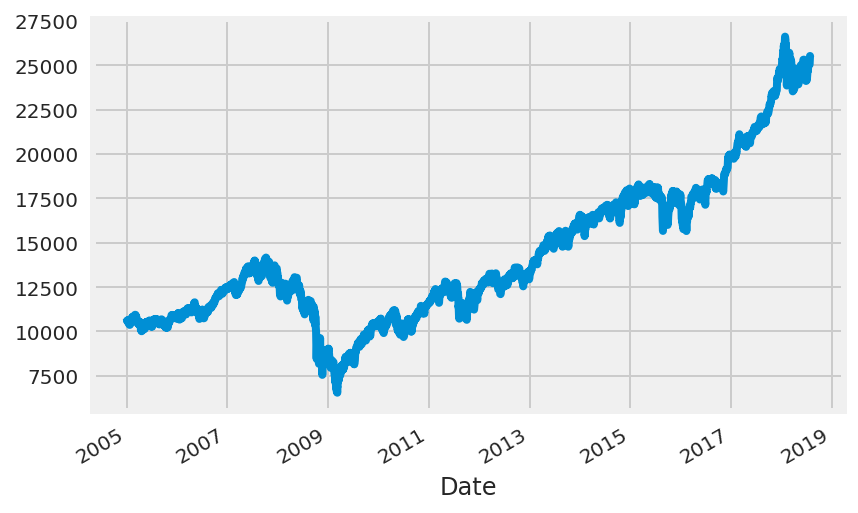

In [59]:
dowj['Close'].plot()

In [13]:
plt.show()

In [14]:
dowj=dowj.reindex(index=dowj.index[::-1])

In [15]:
dowj['change_after_3_days']=((dowj['Close'].shift(-3) - dowj['Close']) / dowj['Close'] ) * abs( ((dowj['Volume'].shift(-3) - dowj['Volume']) / dowj['Volume']) )* 1000

In [16]:
dowj['change_after_2_days']=((dowj['Close'].shift(-2) - dowj['Close']) / dowj['Close']) * abs(((dowj['Volume'].shift(-2) - dowj['Volume']) / dowj['Volume'])) * 1000

In [17]:
dowj['change_after_1_days']=((dowj['Close'].shift(-1) - dowj['Close']) / dowj['Close']) * abs(((dowj['Volume'].shift(-1) - dowj['Volume']) / dowj['Volume'])) * 1000

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


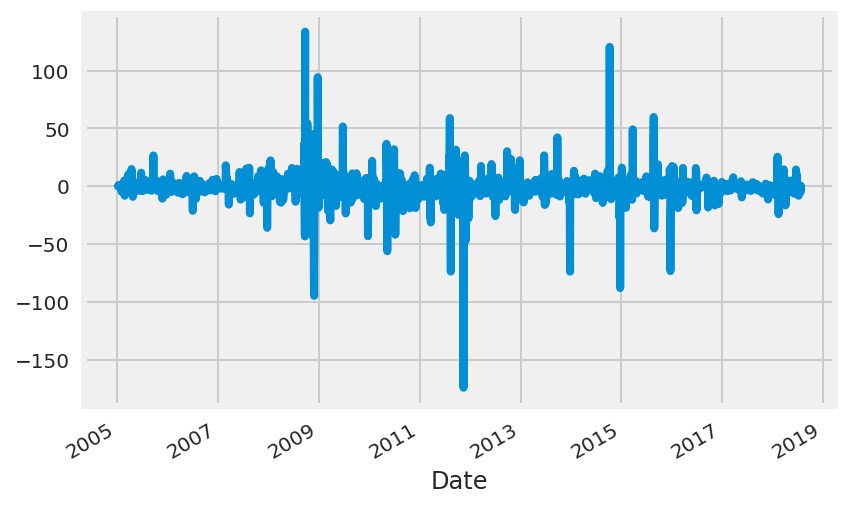

In [60]:
dowj['change_after_3_days'].plot()


In [ ]:

dowj['change_after_2_days'].plot()

In [19]:
dowj['binary_sentiment_after_3_days']=np.where(dowj['change_after_3_days']>=0, 'pos', 'neg')

dowj['sentiment_after_3_days']=pd.cut( dowj['change_after_3_days'], [-np.inf, -.1, .1, np.inf],labels=['positive', 'neutral', 'negative'])

In [20]:
dowj['binary_sentiment_after_2_days']=np.where(dowj['change_after_2_days']>=0, 'pos', 'neg')
dowj['sentiment_after_2_days']=pd.cut( dowj['change_after_2_days'], [-np.inf, -.1, .1, np.inf],labels=['positive', 'neutral', 'negative'])

In [21]:
dowj['binary_sentiment_after_1_days']=np.where(dowj['change_after_1_days']>=0, 'pos', 'neg')
dowj['sentiment_after_1_days']=pd.cut( dowj['change_after_1_days'], [-np.inf, -.1, .1, np.inf],labels=['positive', 'neutral', 'negative'])

In [22]:
dowj.head()

,Close,Volume,change_after_3_days,change_after_2_days,change_after_1_days,binary_sentiment_after_3_days,sentiment_after_3_days,binary_sentiment_after_2_days,sentiment_after_2_days,binary_sentiment_after_1_days,sentiment_after_1_days
Date,,,,,,,,,,,
2018-07-27,25451.060547,329680000,-1.364282,-0.246723,0.291241,neg,positive,neg,positive,pos,negative
2018-07-26,25527.070313,297530000,-4.367557,-0.848064,-0.354899,neg,positive,neg,positive,neg,positive
2018-07-25,25414.099609,273670000,-0.020985,-2.384733,-0.031437,neg,neutral,neg,positive,neg,neutral
2018-07-24,25241.939453,274940000,-0.276641,-0.022779,-1.313489,neg,positive,neg,neutral,neg,positive
2018-07-23,25044.289063,228820000,0.650495,0.200817,0.109229,pos,negative,pos,negative,pos,negative


In [23]:
dowj.groupby('sentiment_after_1_days').size()

sentiment_after_1_days
positive    1497
neutral      627
negative    1291
dtype: int64

In [24]:
dowj.groupby('sentiment_after_2_days').size()

sentiment_after_2_days
positive    1658
neutral      433
negative    1323
dtype: int64

In [25]:
dowj.groupby('sentiment_after_3_days').size()

sentiment_after_3_days
positive    1772
neutral      314
negative    1327
dtype: int64

In [26]:
#load reddit data from CSV 

reddit_csv = mybucket.object('reddit_data_latest.csv')

uri = reddit_csv.uri
%gcs read --object $uri --variable reddit

reddit_data = pd.read_csv(BytesIO(reddit), index_col=0, parse_dates=True, infer_datetime_format=True)

In [27]:
reddit_data = reddit_data.drop([ 'score','selftext'], axis = 1)

In [28]:
reddit_data.head()

,title
date,
2010-12-31,Hiding A Depression: How The US Government Doe...
2010-12-31,"Banks ""Open Loan Spigot"": After declining stea..."
2010-12-31,Will Silver Be Worth More Than Gold? Perspecti...
2010-12-31,In 2011 The Baby Boomers Start To Turn 65: 16 ...
2010-12-31,Slide Show: CEO Bonus Season Is Here. \r\n To...


In [29]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    #neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], stripped)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

/usr/local/envs/py3env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/envs/py3env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [30]:
reddit_data['title_clean'] = reddit_data['title'].apply(cleaner)

/usr/local/envs/py3env/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.nationalreview.com/corner/252795/what-happens-when-state-goes-bankrupt-richard-epstein" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/envs/py3env/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.zerohedge.com/article/use-corexit-1978-oil-spill-delayed-recovery-decades" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/envs/py3env/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://online.wsj.com/article/SB10001424052748704240004575084853361540506

In [31]:
reddit_data = reddit_data.drop(['title'], axis = 1)
reddit_data.head()

,title_clean
date,
2010-12-31,hiding depression how the us government does it
2010-12-31,banks open loan spigot after declining steadil...
2010-12-31,will silver be worth more than gold perspectiv...
2010-12-31,in the baby boomers start to turn statistics a...
2010-12-31,slide show ceo bonus season is here top execut...


In [32]:
reddit_data.dropna(inplace=True)
reddit_data.reset_index(drop=True,inplace=True)
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57684 entries, 0 to 57683
Data columns (total 1 columns):
title_clean    57684 non-null object
dtypes: object(1)
memory usage: 450.7+ KB


In [49]:

data = []
for t in reddit_data.title_clean:
    data.append(t)
data = pd.Series(data).str.cat(sep=' ')



/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


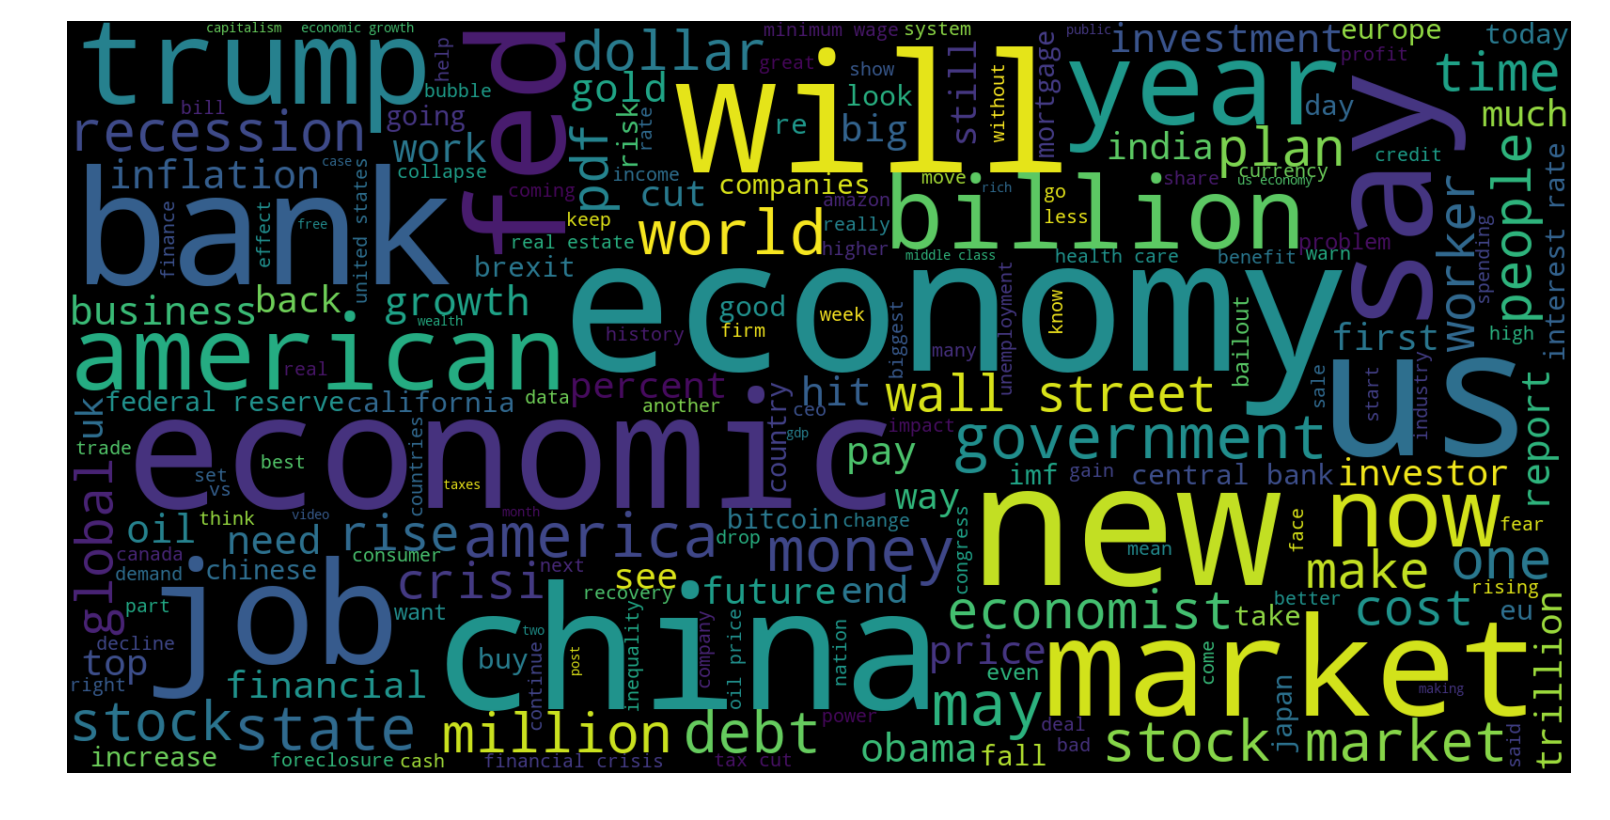

In [51]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(data)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
data = []
for t in reddit_data.title_clean:
    data.append(t)
vectorizer = TfidfVectorizer(ngram_range=(1,5))
X = vectorizer.fit_transform(data)
features_by_gram = defaultdict(list)
for f, w in zip(vectorizer.get_feature_names(), vectorizer.idf_):
    features_by_gram[len(f.split(' '))].append((f, w))
top_n = 25
for gram, features in features_by_gram.items():
    top_features = sorted(features, key=lambda x: x[1], reverse=True)[:top_n]
    top_features = [f[0] for f in top_features]
    print ('%s-gram top: %s'% (gram, top_features))

1-gram top: ['aafa', 'aai', 'aanalyst', 'aar', 'aargh', 'aarp', 'aasi', 'aauk', 'aautomobiles', 'aba', 'abated', 'abatement', 'abatements', 'abating', 'abba', 'abbas', 'abbey', 'abbott', 'abd', 'abdicate', 'abdication', 'abdul', 'abebooks', 'abelman', 'aben']
2-gram top: ['aa and', 'aa credit', 'aa from', 'aa on', 'aa outlook', 'aa with', 'aaa bonds', 'aaa debt', 'aaa finds', 'aaa is', 'aaa outlook', 'aaa rated', 'aaa states', 'aaa to', 'aadhaar pay', 'aadhar card', 'aadhar to', 'aafa ceo', 'aal breaks', 'aapl apple', 'aapl nasdaq', 'aapl tsla', 'aar mobility', 'aargh beware', 'aaron fifield']
3-gram top: ['aa and changes', 'aa credit rating', 'aa from aaa', 'aa on brexit', 'aa outlook negative', 'aa with stable', 'aaa credit ratings', 'aaa debt rating', 'aaa finds millions', 'aaa is junk', 'aaa outlook stable', 'aaa rated assets', 'aaa rating after', 'aaa rating back', 'aaa rating downgraded', 'aaa rating telegraph', 'aaa states to', 'aaa to our', 'aadhaar bill to', 'aadhaar pay the',

In [54]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
X = vectorizer.fit_transform(data)


In [58]:
X.shape

(57684, 29452)

In [28]:
merged_data_2=pd.merge(dowj,reddit_data, how='inner', left_index=True, right_index=True)
merged_data_2 = merged_data_2[::-1]
merged_data_2 = merged_data_2.dropna(how = 'any')
merged_data_2.dropna(inplace=True)
merged_data_2.head()
file_name = "merged2_data.csv"
merged_data_2.to_csv(file_name, sep=',', encoding='utf-8')

!gsutil cp 'merged2_data.csv' 'gs://bharti_patel/merged2_data.csv'



Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

Copying file://merged2_data.csv [Content-Type=text/csv]...
/ [1 files][  8.3 MiB/  8.3 MiB]                                                
Operation completed over 1 objects/8.3 MiB.                                      


In [29]:
reddit_data_merged = reddit_data.groupby(level=0).sum()

In [30]:
reddit_data_merged = reddit_data_merged[::-1]

In [31]:
print(reddit_data_merged.shape)

(1888, 1)


In [32]:
merged_data=pd.merge(dowj,reddit_data_merged, how='inner', left_index=True, right_index=True)

In [33]:
merged_data = merged_data[::-1]

In [34]:
merged_data = merged_data.dropna(how = 'any')

In [35]:
merged_data.head()

,Close,Volume,change_after_3_days,change_after_2_days,change_after_1_days,binary_sentiment_after_3_days,sentiment_after_3_days,binary_sentiment_after_2_days,sentiment_after_2_days,binary_sentiment_after_1_days,sentiment_after_1_days,title_clean
2008-03-31,12262.889648,273610000,1.839884,0.450750,-0.895215,pos,negative,pos,negative,neg,positive,resource warssilver gold the last american her...
2008-04-01,12654.360352,295530000,-5.659022,-10.133497,-2.294553,neg,positive,neg,positive,neg,positive,usa the great depressionventure capitalist fre...
2008-04-02,12608.919922,232760000,-3.177763,-4.816371,0.971870,neg,positive,neg,positive,pos,negative,bush caused the financial market meltdown
2008-04-04,12609.419922,181260000,2.246841,-0.011266,0.018968,pos,negative,neg,neutral,pos,neutral,the death of financial systemfed interest rate...
2008-04-11,12325.419922,286850000,6.365066,5.246454,4.319129,pos,negative,pos,negative,pos,negative,the black death of financial collapserich coun...


In [36]:
merged_data.dropna(inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1310 entries, 2008-03-31 to 2018-05-31
Data columns (total 12 columns):
Close                            1310 non-null float64
Volume                           1310 non-null int64
change_after_3_days              1310 non-null float64
change_after_2_days              1310 non-null float64
change_after_1_days              1310 non-null float64
binary_sentiment_after_3_days    1310 non-null object
sentiment_after_3_days           1310 non-null category
binary_sentiment_after_2_days    1310 non-null object
sentiment_after_2_days           1310 non-null category
binary_sentiment_after_1_days    1310 non-null object
sentiment_after_1_days           1310 non-null category
title_clean                      1310 non-null object
dtypes: category(3), float64(4), int64(1), object(4)
memory usage: 106.5+ KB


In [37]:
merged_data.head()

,Close,Volume,change_after_3_days,change_after_2_days,change_after_1_days,binary_sentiment_after_3_days,sentiment_after_3_days,binary_sentiment_after_2_days,sentiment_after_2_days,binary_sentiment_after_1_days,sentiment_after_1_days,title_clean
2008-03-31,12262.889648,273610000,1.839884,0.450750,-0.895215,pos,negative,pos,negative,neg,positive,resource warssilver gold the last american her...
2008-04-01,12654.360352,295530000,-5.659022,-10.133497,-2.294553,neg,positive,neg,positive,neg,positive,usa the great depressionventure capitalist fre...
2008-04-02,12608.919922,232760000,-3.177763,-4.816371,0.971870,neg,positive,neg,positive,pos,negative,bush caused the financial market meltdown
2008-04-04,12609.419922,181260000,2.246841,-0.011266,0.018968,pos,negative,neg,neutral,pos,neutral,the death of financial systemfed interest rate...
2008-04-11,12325.419922,286850000,6.365066,5.246454,4.319129,pos,negative,pos,negative,pos,negative,the black death of financial collapserich coun...


In [38]:

x = merged_data.title_clean
y = merged_data.sentiment_after_3_days
z = merged_data.binary_sentiment_after_3_days

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split

In [52]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
    return accuracy,f1,recall,precision,train_test_time


In [53]:

SEED = 2000
#x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
#x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.02, random_state=SEED)

In [71]:


names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        #print ("Validation result for %s" % n)
        #print(c)
        clf_accuracy,clf_f1_score,clf_recall,clf_precision,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,clf_accuracy,clf_f1_score,clf_recall,clf_precision,tt_time))
    return result


bigram_result = classifier_comparator(n_features=100000,ngram_range=(1,2))
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))
fourgram_result = classifier_comparator(n_features=100000,ngram_range=(1,4))

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [72]:
print (bigram_result)

[('Logistic Regression', 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 2.9066312313079834), ('Linear SVC', 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 2.9578585624694824), ('LinearSVC with L1-based feature selection', 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 3.0396568775177), ('Multinomial NB', 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 2.918926954269409), ('Bernoulli NB', 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 2.911381721496582), ('Ridge Classifier', 0.4074074074074074, 0.4074074074074074, 0.4074074074074074, 0.4074074074074074, 3.0624706745147705), ('AdaBoost', 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 7.110921859741211), ('Perceptron', 0.5925925925925926, 0.5925925925925926, 0.5925925925925926, 0.5925925925925926, 2.9389536380767822), ('Passive-Aggresive', 0.481

In [73]:

SEED = 2000
#x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
#x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

x_train, x_test, y_train, y_test = train_test_split(x, z, test_size=.02, random_state=SEED)

In [74]:


names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        #print ("Validation result for %s" % n)
        #print(c)
        clf_accuracy,clf_f1_score,clf_recall,clf_precision,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,clf_accuracy,clf_f1_score,clf_recall,clf_precision,tt_time))
    return result

bigram_result_new = classifier_comparator(n_features=100000,ngram_range=(1,2))
trigram_result_new = classifier_comparator(n_features=100000,ngram_range=(1,3))
fourgram_result_new = classifier_comparator(n_features=100000,ngram_range=(1,4))

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [75]:
print (bigram_result_new)

[('Logistic Regression', 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 2.9806323051452637), ('Linear SVC', 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 3.09218692779541), ('LinearSVC with L1-based feature selection', 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 3.1832807064056396), ('Multinomial NB', 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 3.0667707920074463), ('Bernoulli NB', 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 0.5185185185185185, 2.9383692741394043), ('Ridge Classifier', 0.4074074074074074, 0.4074074074074074, 0.4074074074074074, 0.4074074074074074, 3.3618271350860596), ('AdaBoost', 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 7.179056406021118), ('Perceptron', 0.5925925925925926, 0.5925925925925926, 0.5925925925925926, 0.5925925925925926, 2.863126516342163), ('Passive-Aggresive', 0.4

In [62]:
file_name = "merged_data.csv"
merged_data.to_csv(file_name, sep=',', encoding='utf-8')

!gsutil cp 'merged_data.csv' 'gs://bharti_patel/merged_data.csv'

Copying file://merged_data.csv [Content-Type=text/csv]...
/ [1 files][  2.9 MiB/  2.9 MiB]                                                
Operation completed over 1 objects/2.9 MiB.                                      
